<a href="https://colab.research.google.com/github/Nathtaba/Case_Fraude_Cartao_ML/blob/main/Fraude_Cartao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score #métrica de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

In [2]:
df_cartao = pd.read_csv('card_transdata.csv', sep=',')

In [3]:
df_cartao.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [11]:
df_cartao.shape

(316158, 8)

In [10]:
#Verificar se existe valores nulos
df_cartao.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
#Deletar os valores nulos
df_cartao = df_cartao.dropna()

In [15]:
df_cartao.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,316158.000000,316158.000000,316158.000000,316158.000000,316158.000000,316158.000000,316158.000000,316158.000000
mean,26.668678,4.989401,1.815548,0.882182,0.350995,0.101440,0.651842,0.086492
std,64.348156,22.847792,2.792531,0.322393,0.477282,0.301911,0.476387,0.281089
min,0.021322,0.000419,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.877882,0.295838,0.474772,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.968082,0.999009,0.996602,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.724643,3.343822,2.093949,1.000000,1.000000,0.000000,1.000000,0.000000
max,5797.972589,2663.513077,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Número de transações fraudulentas
df_cartao[df_cartao["fraud"] == 1].fraud.count() #filtro com contagem dos dados

27345

In [16]:
Total = len(df_cartao)
TotalNaoFraudes = df_cartao[df_cartao["fraud"] == 0].fraud.count()
TotalFraudes = df_cartao[df_cartao["fraud"] == 1].fraud.count()

Percentual_Fraudes = TotalFraudes / Total

print("Total de dados: ", Total)
print("Total de não fraudes: ", TotalNaoFraudes)
print("Total de fraudes: ", TotalFraudes)
print("Percentual de fraudes na base: ", (round(Percentual_Fraudes, 2)*100), "%")

Total de dados:  316158
Total de não fraudes:  288813
Total de fraudes:  27345
Percentual de fraudes na base:  9.0 %


In [ ]:
categororias = ["Non-Fraud", "Fraud"]
plt.pie(df_cartao["fraud"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "y"))
plt.show()

In [20]:
dados_fraudes = df_cartao[df_cartao["fraud"] == 1]

In [ ]:

plt.figure(figsize = (10,10)) #Configurando o tamanho da visualização

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Paired", data = dados_fraudes) #Aconteceu no mesmo varejista?

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Paired", data = dados_fraudes) #Uso de cartão de crédito?

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Paired", data = dados_fraudes) #Utilizou o mesmo número de PIN?

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Paired", data = dados_fraudes) #Foi em uma compra online?

In [26]:
for column in [0, 1, 2]:
    dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma

In [ ]:
Colunas_Numericas_Normal = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas_Normal:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [ ]:
correlation_matrix = df_cartao.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [24]:
#Separação da base de treino e teste

X = df_cartao[['distance_from_home','ratio_to_median_purchase_price', 'online_order']]
y = df_cartao['fraud'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=7) #20% para teste e 80% de treino

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)


# Na hora de transformar, devemos transformar ambos os conjuntos
x_train_escalonado = scaler.transform(X_train)#treino
x_test_escalonado = scaler.transform(X_test)#teste

In [44]:
#Analisando o modelo KNN
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature nam

Text(0, 0.5, 'Mean Error')

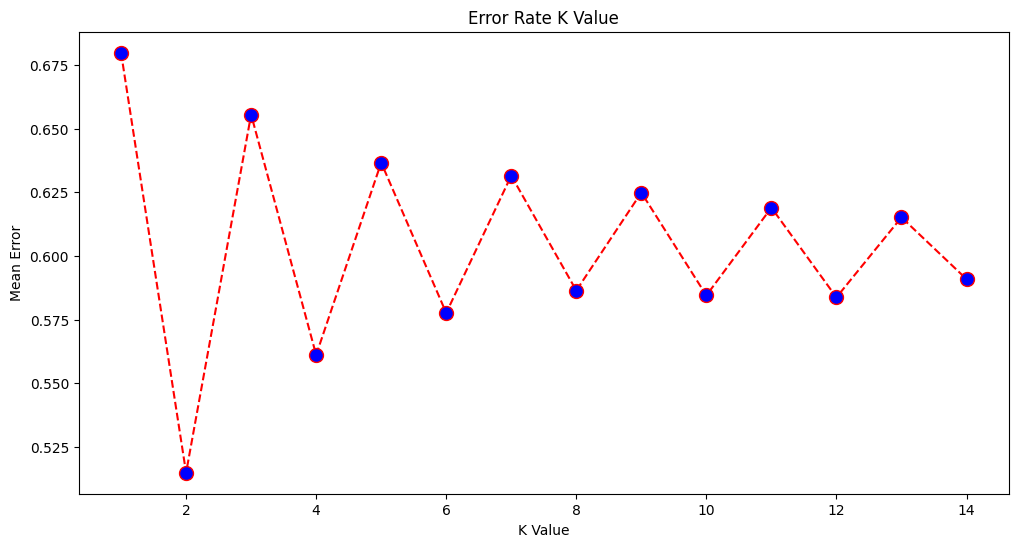

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [46]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=2)

In [47]:
# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier(n_neighbors=2)

In [48]:
y_predito = modelo_classificador.predict(x_test_escalonado) #defininfo as predições

In [51]:
# Acurácia do modelo
print(accuracy_score(y_test, y_predito))

0.959972798582996
